# Final Submission Dicoding

### Mengimport Library yang digunakan

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from google.colab import files
from datetime import datetime
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
%matplotlib inline

In [2]:
print(tf.__version__)

2.2.0-rc4


### Directory, ukuran gambar, dan jumlah Epoch

dataset rps telah saya bagi menjadi 3 folder (train, test, validasi) dengan masing-masing terdapat folder rock, paper scissors didalamnya.
![Directory Dataset RPS](https://drive.google.com/open?id=1hWpRX4rn1N4bJGGOZJ-k8sLjumzq2OD6)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
root_dir = '/content/drive/My Drive/rps-cv-images'
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')
val_dir = os.path.join(root_dir, 'val')
image_size = (100,150)
height = 100
width = 150
depth = 3
epochs = 50
batch_size = 10

In [5]:
os.listdir(test_dir)

['scissors', 'rock', 'paper']

### Membuat ImageDataGenerator

In [0]:
image_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rescale=1./255,
    shear_range=0.2,
    rotation_range=20,
    fill_mode='nearest'
)

### Meload Gambar

In [7]:
## Data Train
print('Data Train')
train_data = image_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

## Data Validasi
print('Data Validasi')
val_data = image_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

## Data Test
print('Data Test')
test_data = image_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Data Train
Found 1800 images belonging to 3 classes.
Data Validasi
Found 194 images belonging to 3 classes.
Data Test
Found 194 images belonging to 3 classes.


### Membuat Model Arsitektur CNN

In [0]:
def cnn(input_shape):
    name = 'cnn'
    model = Sequential(name=name)
    model.add(Conv2D(16, (3,3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(4,4))
    model.add(Dropout(0.25))
    model.add(Conv2D(16, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(16, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))
    model.add(Conv2D(16, (5,5), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(16, (5,5), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    return model

In [0]:
input_shape = (height, width, depth)
model = cnn(input_shape)

In [10]:
model.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 16)       448       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 148, 16)       64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 37, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 37, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 35, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 35, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 33, 16)        2320    

In [0]:
def compile_and_fit(model, num_epochs):
    model.compile(
        loss= 'sparse_categorical_crossentropy', 
        optimizer= Adam(lr=1e-3, decay=1e-3 / num_epochs),
        metrics= ['accuracy']
    )

    history = model.fit(
        train_data,
        steps_per_epoch=100,
        epochs=num_epochs,
        validation_data=val_data,
        validation_steps=10,
        verbose=1
    )

    return history

### Melakukan Training Model

In [12]:
time_start = datetime.now()
model_history = compile_and_fit(model, epochs)
time_finish = datetime.now()
duration = time_finish - time_start

Epoch 1/50
100/100 [==============================] - 9s 89ms/step - loss: 1.0195 - accuracy: 0.4270 - val_loss: 1.1047 - val_accuracy: 0.3200
Epoch 2/50
100/100 [==============================] - 9s 86ms/step - loss: 0.5831 - accuracy: 0.8010 - val_loss: 2.3194 - val_accuracy: 0.3085
Epoch 3/50
100/100 [==============================] - 9s 86ms/step - loss: 0.2974 - accuracy: 0.8990 - val_loss: 1.4642 - val_accuracy: 0.3500
Epoch 4/50
100/100 [==============================] - 9s 86ms/step - loss: 0.2406 - accuracy: 0.9220 - val_loss: 1.1448 - val_accuracy: 0.6064
Epoch 5/50
100/100 [==============================] - 9s 87ms/step - loss: 0.1990 - accuracy: 0.9330 - val_loss: 1.1949 - val_accuracy: 0.6900
Epoch 6/50
100/100 [==============================] - 8s 85ms/step - loss: 0.2156 - accuracy: 0.9350 - val_loss: 0.9124 - val_accuracy: 0.6915
Epoch 7/50
100/100 [==============================] - 9s 86ms/step - loss: 0.1551 - accuracy: 0.9480 - val_loss: 0.2475 - val_accuracy: 0.9300

In [13]:
print('Training Duration', str(duration))

Training Duration 0:07:09.628581


### Grafik perubahan epoch terhadap Akurasi

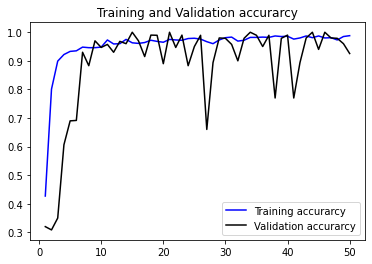

In [14]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'blue', label='Training accurarcy')
plt.plot(epochs, val_acc, 'black', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.show()

### Memprediksi Gambar

Saving YEGCpdShhdOdneq4.png to YEGCpdShhdOdneq4.png
0
paper


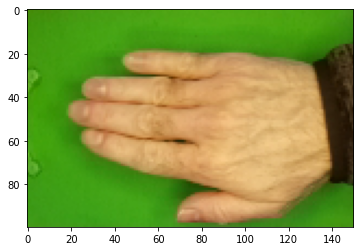

In [39]:
uploaded = files.upload()

for fn in uploaded.keys():

    # predicting images
    path = fn
    img = image.load_img(path, target_size=image_size)
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    predict = model.predict(images, batch_size=batch_size)
    classes = np.argmax(predict[0], axis=0)
    print(classes)
    # print(fn)
    if classes == 0:
        print('paper')
    elif classes == 1:
        print('rock')
    else:
        print('scissors')